# Manipulação Básica de Dados

## 1. Importando e Corrigindo dados
Dados foram importados de planilha de Excel e arquivos de texto.
Atraves de "merge" foram criadas demais colunas no banco de dados principais.

In [1]:
# O comando abaixo deve ser rodado no termial para que os widgets aparecam
# jupyter nbextension enable --py widgetsnbextension 
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set_style("dark")
# sns.set_style("darkgrid")
# sns.set_context("talk")
import pandas as pd

import missingno as msno

Primeiro passo consiste em importar as bibliotecas.

In [2]:
folder     = 'SampleDataBase/ExampleSalesData/' #Definir pasta de onde virão os dados
data       = pd.read_table(folder+"Base_dados.txt")
produto    = pd.read_excel(folder+"Curso_Excel.xlsm",sheetname=0)
marca      = pd.read_excel(folder+"Curso_Excel.xlsm",sheetname=1)
vendedores = pd.read_table(folder+"Base_Vendedores.txt", sep=';',decimal=',')

In [3]:
print('data')
print(' ')
print(data.dtypes)
print('--')
print('produto')
print(' ')
print(produto.dtypes)

print('--')
print('marca')
print(' ')
print(marca.dtypes)

print('--')
print('vendedores')
print(' ')
print(vendedores.dtypes)

data
 
DATA                object
COD_ITEM            object
COD_VENDEDOR         int64
VOLUME_META          int64
RECEITA_META         int64
VOLUME_FATURADO      int64
RECEITA_FATURADO     int64
dtype: object
--
produto
 
COD_PRODUTO     object
NOME_PRODUTO    object
dtype: object
--
marca
 
COD_MARCA     object
NOME_MARCA    object
dtype: object
--
vendedores
 
COD_VENDEDOR     float64
NOME_VENDEDOR     object
FILIAL            object
dtype: object


In [4]:
data.head()

,DATA,COD_ITEM,COD_VENDEDOR,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO
0,1/3/2002,AC08,13,13,6630,6,3102
1,1/3/2002,AC08,18,9,4590,6,3559
2,1/3/2002,AC08,28,14,7140,7,2981
3,1/3/2002,AC08,1033,5,2550,4,1844
4,1/3/2002,FB04,6,13,6825,7,4220


In [5]:
data.describe()

,COD_VENDEDOR,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO
count,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000
mean,248.585468,9.268464,6269.421723,9.292734,6548.154157
std,424.717730,5.539069,4641.905489,5.459443,4746.902883
min,1.000000,1.000000,300.000000,1.000000,250.000000
25%,9.000000,5.000000,2800.000000,5.000000,3083.500000
50%,18.000000,9.000000,5390.000000,9.000000,5535.000000
75%,32.000000,13.000000,8260.000000,13.000000,8779.000000
max,1265.000000,45.000000,51750.000000,51.000000,44406.000000


In [6]:
# plt.plot(data.VOLUME_META,data.VOLUME_FATURADO,'o')
marca

,COD_MARCA,NOME_MARCA
0,B,Brastemp
1,C,Cônsul


In [7]:
produto.head()

,COD_PRODUTO,NOME_PRODUTO
0,F,Fogão
1,R,Refrigerador
2,L,Lava-Louças
3,A,Ar-Condicionado


In [8]:
vendedores.head()

,COD_VENDEDOR,NOME_VENDEDOR,FILIAL
0,1.0,ADONAY LARONGA,SUL
1,3.0,OSWALDO LOPES DA SILVA,NORDESTE
2,4.0,MARIO JARBAS V.DO A JUNIOR,NORDESTE
3,5.0,ANGELA CRISTINA CRIVELARO FONS,SUDESTE
4,6.0,MANOEL DO PRADO,SUDESTE


In [9]:
#Ajustando o tipo de dado

data.DATA  = pd.to_datetime(data.DATA,infer_datetime_format=True) #Ajustando formato para data
# data.DATA  = pd.to_datetime(data.DATA,format='%d/%m/%Y') #Ajustando formato para data usando "format"

vendedores.COD_VENDEDOR = vendedores.COD_VENDEDOR.astype(int) #

data['COD_PRODUTO'] = data.COD_ITEM.str[0]
data['COD_MARCA']   = data.COD_ITEM.str[1]

In [10]:
data = pd.merge(data,vendedores,on='COD_VENDEDOR',how='outer')
data = pd.merge(data,produto,on='COD_PRODUTO',how='outer')
data = pd.merge(data,marca,on='COD_MARCA',how='outer')

In [11]:
data.head()

,DATA,COD_ITEM,COD_VENDEDOR,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO,COD_PRODUTO,COD_MARCA,NOME_VENDEDOR,FILIAL,NOME_PRODUTO,NOME_MARCA
0,2002-01-03,AC08,13,13,6630,6,3102,A,C,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul
1,2002-08-03,AC08,13,1,510,11,6250,A,C,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul
2,2002-12-03,AC08,13,5,2550,12,5468,A,C,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul
3,2002-03-13,AC08,13,8,4080,10,4530,A,C,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul
4,2002-03-14,AC08,13,14,7140,7,3818,A,C,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul


In [12]:
data.describe()

,COD_VENDEDOR,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO
count,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000
mean,248.585468,9.268464,6269.421723,9.292734,6548.154157
std,424.717730,5.539069,4641.905489,5.459443,4746.902883
min,1.000000,1.000000,300.000000,1.000000,250.000000
25%,9.000000,5.000000,2800.000000,5.000000,3083.500000
50%,18.000000,9.000000,5390.000000,9.000000,5535.000000
75%,32.000000,13.000000,8260.000000,13.000000,8779.000000
max,1265.000000,45.000000,51750.000000,51.000000,44406.000000


Dados possuem informações faltantes. Abaixo tais informações faltantes são mostradas.
Os dados faltantes podem ser preenchidos com algum valor padrão, como 'DESCONHECIDO', ou simplesmente ser descartados.

In [13]:
data.isnull().sum()

DATA                  0
COD_ITEM              0
COD_VENDEDOR          0
VOLUME_META           0
RECEITA_META          0
VOLUME_FATURADO       0
RECEITA_FATURADO      0
COD_PRODUTO           0
COD_MARCA             0
NOME_VENDEDOR       556
FILIAL              556
NOME_PRODUTO          0
NOME_MARCA            0
dtype: int64

Podemos ver quais são os casos em que tem valores faltando.

In [14]:
data[(data['FILIAL'].isnull()) & (data['NOME_VENDEDOR'].isnull())].head()

,DATA,COD_ITEM,COD_VENDEDOR,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO,COD_PRODUTO,COD_MARCA,NOME_VENDEDOR,FILIAL,NOME_PRODUTO,NOME_MARCA
369,2002-08-03,AC08,1004,9,4590,4,1768,A,C,NaN,NaN,Ar-Condicionado,Cônsul
370,2002-11-03,AC08,1004,6,3060,9,5398,A,C,NaN,NaN,Ar-Condicionado,Cônsul
371,2002-03-18,AC08,1004,15,7650,5,2771,A,C,NaN,NaN,Ar-Condicionado,Cônsul
372,2002-03-28,AC08,1004,2,1020,8,3993,A,C,NaN,NaN,Ar-Condicionado,Cônsul
373,2002-07-04,AC08,1004,2,1020,2,1198,A,C,NaN,NaN,Ar-Condicionado,Cônsul


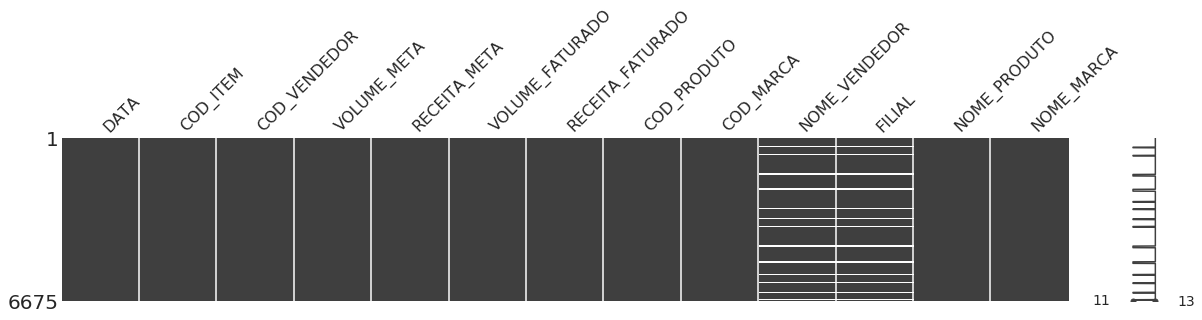

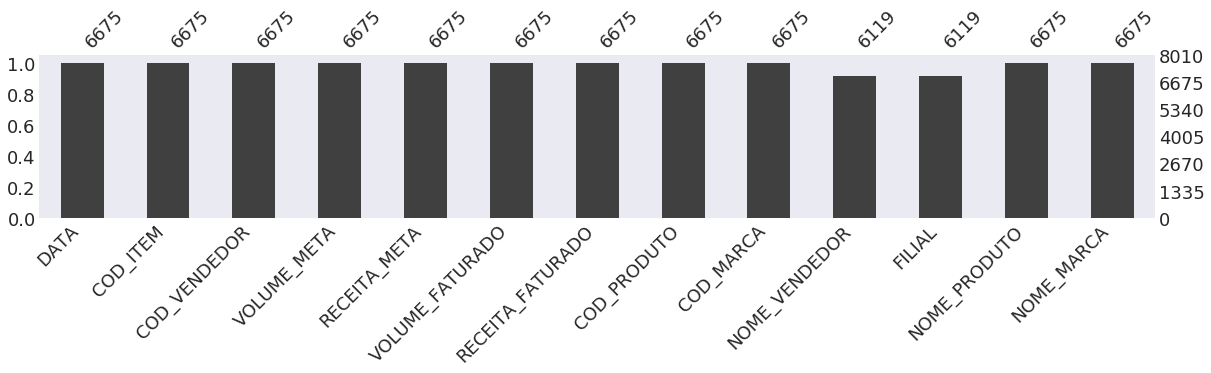

In [15]:
msno.matrix(df=data, figsize=(20, 3)) #Grafico de valores faltantes
msno.bar(df=data,figsize=(20,3),fontsize=18,labels=True)

In [16]:
data_completo = data.fillna(value='DESCONHECIDO') #Criando uma base que preserva a linhas com NaN
data  = data.dropna() #Retirando as linhas com valores vazios
data.isnull().sum()

DATA                0
COD_ITEM            0
COD_VENDEDOR        0
VOLUME_META         0
RECEITA_META        0
VOLUME_FATURADO     0
RECEITA_FATURADO    0
COD_PRODUTO         0
COD_MARCA           0
NOME_VENDEDOR       0
FILIAL              0
NOME_PRODUTO        0
NOME_MARCA          0
dtype: int64

In [17]:
data.describe()

,COD_VENDEDOR,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO
count,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000
mean,226.286975,9.299395,6283.857656,9.304788,6550.415918
std,409.883731,5.577935,4672.144964,5.505363,4793.584658
min,1.000000,1.000000,300.000000,1.000000,250.000000
25%,9.000000,5.000000,2800.000000,5.000000,3063.000000
50%,18.000000,9.000000,5390.000000,9.000000,5513.000000
75%,32.000000,13.000000,8260.000000,13.000000,8791.000000
max,1265.000000,45.000000,51750.000000,51.000000,44406.000000


## 3. Criando Tabela Dinamica (Pivot Table)


In [18]:
pd.pivot_table(data,index=['FILIAL'],values=['VOLUME_META','VOLUME_FATURADO'],aggfunc='sum')

,VOLUME_FATURADO,VOLUME_META
FILIAL,,
CENTRO-OESTE,9398,9505
NORDESTE,5972,5789
SUDESTE,36545,36560
SUL,5021,5049


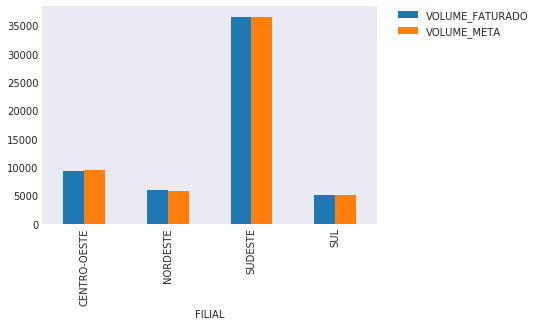

In [19]:
pd.pivot_table(data,index=['FILIAL'],
               values=['VOLUME_META','VOLUME_FATURADO'],
               aggfunc='sum').plot(kind='bar',figsize=(6,4))
# plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 3. Criando Widget para Pivot Table
Atraves da biblioteca ipywidgets, criar um widget interativo para escolher opcoes que apareceram no grafico

In [20]:
from ipywidgets import interact, SelectMultiple, Checkbox, RadioButtons, Dropdown
from IPython.display import display

In [21]:
def my_pivot(index=list(data.columns)[0], values=list(data.columns)[1], aggfunc='sum', plotting=False):
    dfp = data
    piv = pd.pivot_table(dfp, index=index, values=values, aggfunc=aggfunc)
#     print(piv)
    if plotting:
        piv.plot(kind='bar',figsize=(6,3))
#         sns.barplot(x='FILIAL',y='VOLUME_FATURADO',data=dfp)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

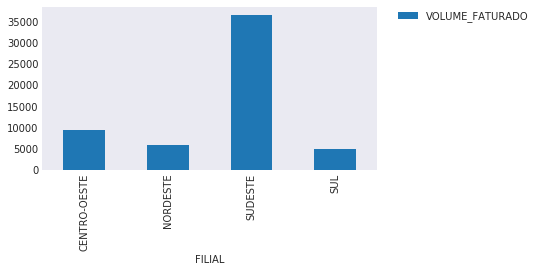

In [22]:
my_pivot(index=['FILIAL'],values=['VOLUME_FATURADO'],aggfunc='sum',plotting='True')

Abaixo tem uma função para utilizar widgets.

In [23]:
# i = interact(my_pivot,
#              index    = Dropdown(options=list(data.columns)[1:]),
#              values   = SelectMultiple(options=list(data.columns)),
#              aggfunc  = Dropdown(options=['sum','mean']),
#              plotting = RadioButtons(options = [False,True])
#             )
# display(i)

## 4. Análise Exploratória com Seaborn

Ajustar o esquema de cores

In [24]:
falconiweak = ["#5f87a1", 
           "#62917f","#af6f65",
           "#e9d3a1",
           "#bab9be"]

falconistrong = ["#3c6e8f",
           "#35705a","#934f46",
           "#c7b18a",
           "#929196"]
falconiblue = ["#5f87a1", "#3c6e8f"]
# sns.palplot(sns.color_palette(falconi))
sns.set_palette(falconiweak)

Plotando as metas de venda x venda faturada - Por filial.

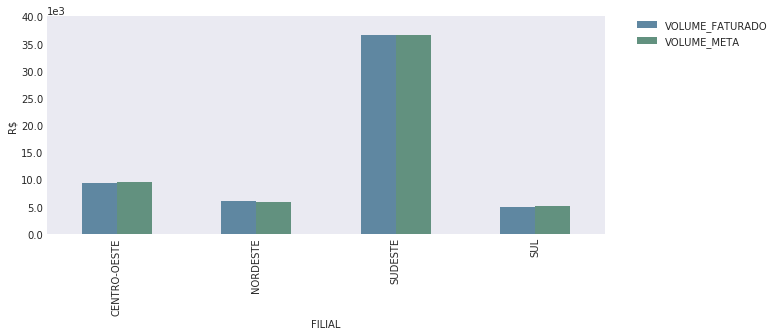

In [25]:
pd.pivot_table(data,index=['FILIAL'],
               values=['VOLUME_META','VOLUME_FATURADO'],
               aggfunc='sum').plot(kind='bar',figsize=(10,4))
# plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs,labels = plt.yticks()
locs = plt.yticks(locs, map(lambda x: "%.1f" % x, locs*1e-3))
plt.ylabel('R$')
text = plt.text(0.0, 1.01, '1e3', fontsize=10, transform = plt.gca().transAxes)

Plotando a quantidade de vendas.

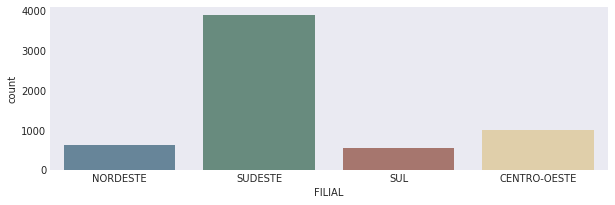

In [26]:
plt.figure(figsize=(10,3))
sns.countplot(x=data.FILIAL)

Utilizando o "pairplot" para vizualizar as relação entre todas as variáveis.

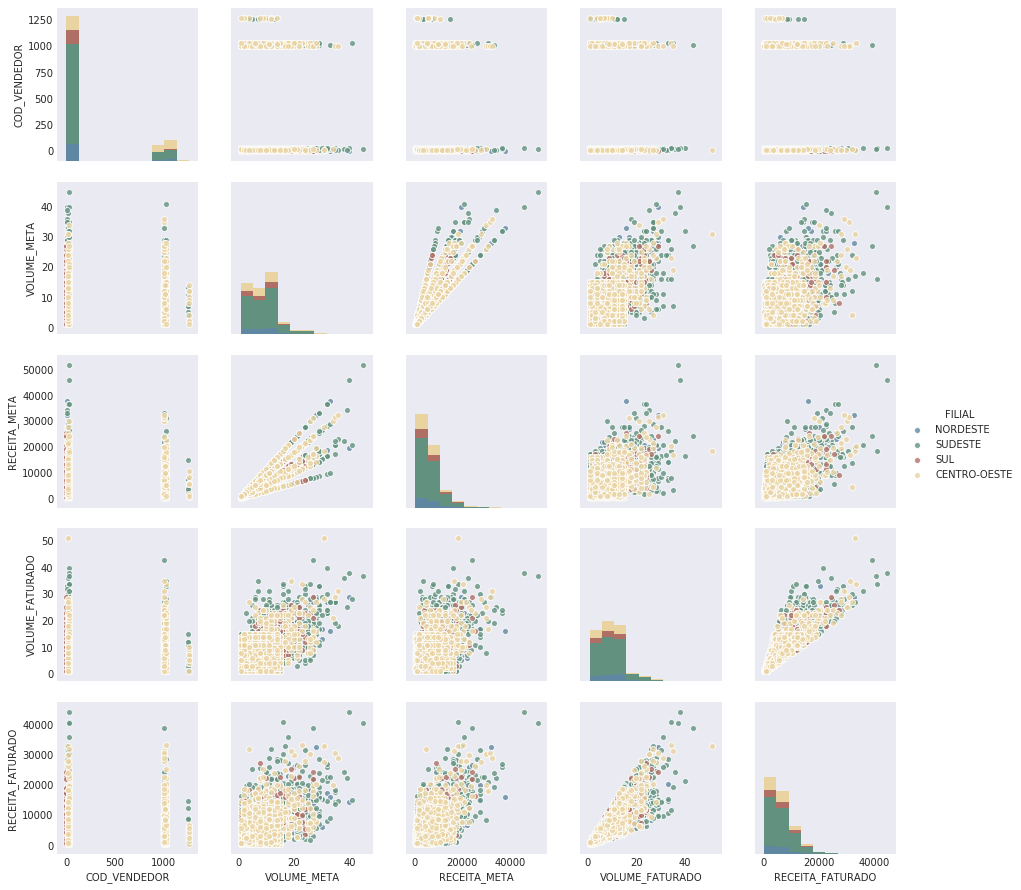

In [37]:
g = sns.pairplot(data=data, hue = 'FILIAL',plot_kws={'alpha':0.8})

Checando a distribuição de Volume_Faturado por filial.

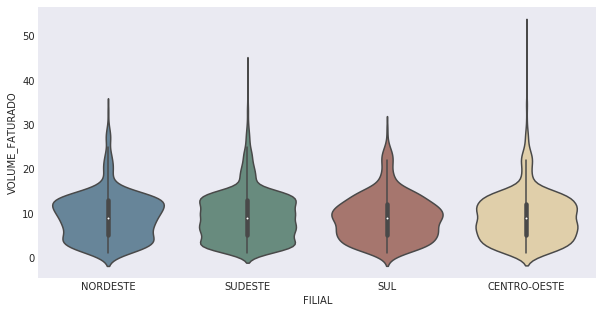

In [31]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data,x='FILIAL',y='VOLUME_FATURADO')

F(x) =  716.572092336 *VOLUME_FATURADO +  -117.13574918
R-Squared =  0.822972680202  -------  P-value =  0.0 ------ Std_Error = 6.32434362354


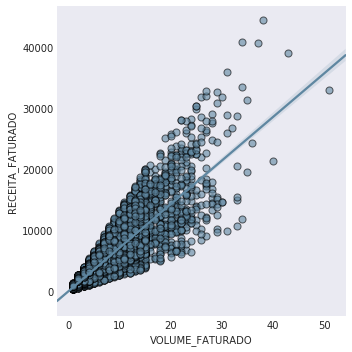

In [53]:
sns.lmplot('VOLUME_FATURADO','RECEITA_FATURADO',data=data,
           scatter_kws={"s": 50, "alpha": 0.6,'edgecolor':'black'})
slope, intercept, r_value, p_value, std_err = stats.linregress(data['VOLUME_FATURADO'],data['RECEITA_FATURADO'])
print('F(x) = ',slope,'*VOLUME_FATURADO + ', intercept)
print('R-Squared = ',r_value,' -------  P-value = ', p_value,'------ Std_Error =', std_err)

FILIAL = NORDESTE
F(x) =  637.762709986 *VOLUME_FATURADO +  402.557602426
R-Squared =  0.784820273872  -------  P-value =  1.56271099401e-135 ------ Std_Error = 19.8755573245
    
FILIAL = SUDESTE
F(x) =  710.683662268 *VOLUME_FATURADO +  -66.967069057
R-Squared =  0.821799019097  -------  P-value =  0.0 ------ Std_Error = 7.88809909214
    
FILIAL = SUL
F(x) =  730.508690548 *VOLUME_FATURADO +  -138.431154983
R-Squared =  0.823693871448  -------  P-value =  3.92928630883e-137 ------ Std_Error = 21.4822094596
    
FILIAL = CENTRO-OESTE
F(x) =  779.262855294 *VOLUME_FATURADO +  -599.143304656
R-Squared =  0.849405620149  -------  P-value =  4.12026248107e-285 ------ Std_Error = 15.1670885382
    


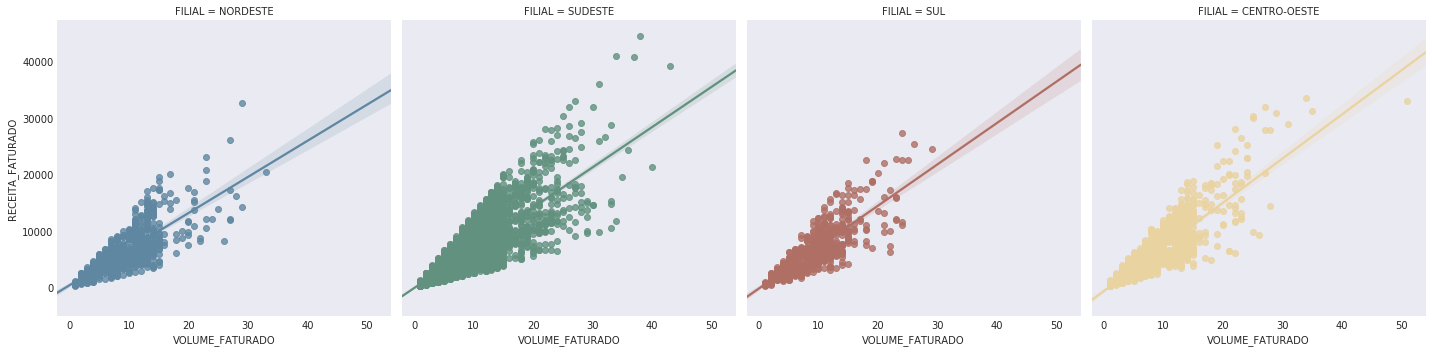

In [64]:
sns.lmplot('VOLUME_FATURADO','RECEITA_FATURADO',data=data,col='FILIAL',hue='FILIAL')
for filial in pd.unique(data['FILIAL']):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['VOLUME_FATURADO'][data.FILIAL == filial],
                                                                   data['RECEITA_FATURADO'][data.FILIAL == filial])
    
    print('FILIAL =', filial)
    print('F(x) = ',slope,'*VOLUME_FATURADO + ', intercept)
    print('R-Squared = ',r_value,' -------  P-value = ', p_value,'------ Std_Error =', std_err)
    print('    ')

#### Visualizando vendas no tempo

In [80]:
data['ANO'] = data.DATA.dt.year
data['MES'] = data.DATA.dt.month
data['DIA'] = data.DATA.dt.day
data['DIA_SEMANA'] = data.DATA.dt.dayofweek

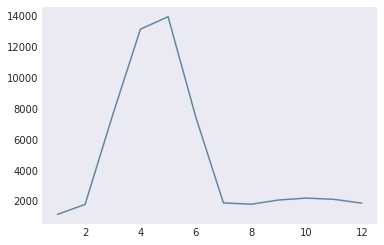

In [96]:
plt.plot(data.groupby(by='MES')['VOLUME_FATURADO'].sum())

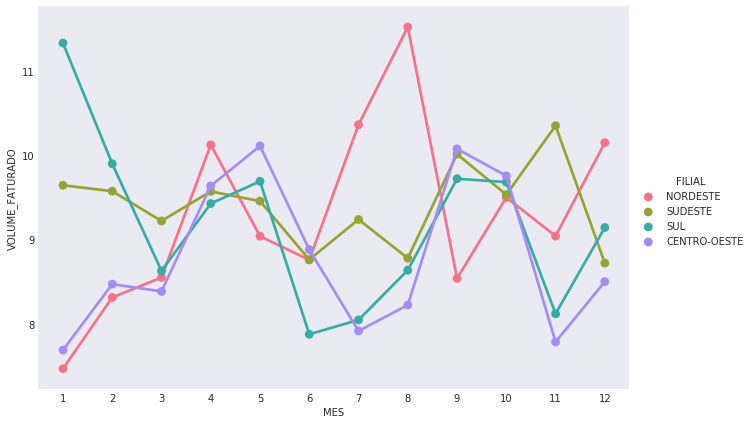

In [111]:
g = sns.factorplot(x="MES", data=data,y ="VOLUME_FATURADO",hue='FILIAL',
                   palette="husl", size=6, aspect=1.5,ci=None,)